<a href="https://colab.research.google.com/github/IoT-master/PyTorchMLTemplates/blob/master/Linear_Regression_with_a_Simple_Line_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install torch

In [0]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Visualization of the scatter X and y values')

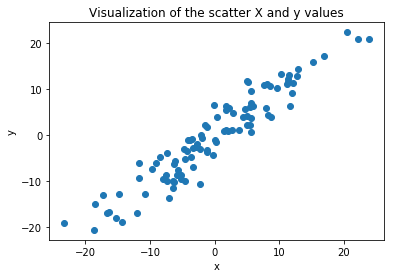

In [3]:
X = torch.randn(100, 1)*10
y = X + torch.randn(100, 1)*3
# plt.axis([min(X), max(X), min(y), max(y)])
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')
plt.title('Visualization of the scatter X and y values')

In [0]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size) 
  def forward(self, x):
    pred = self.linear(x)
    return pred

In [5]:
#This will seed the data, so the results will always be the same on every run
torch.manual_seed(1)
model = LR(1, 1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [6]:
[w, b] = model.parameters()
w1 = w[0][0].item()
b1 = b[0].item()
print(w1, b1)
# This should always show 0.5152631998062134 -0.44137823581695557, where w1 is the first value and b1 is the second value.
def get_params():
  return (w[0][0].item(), b[0].item())

0.5152631998062134 -0.44137823581695557


In [0]:
def plot_fit(title):
  plt.title(title)
  w1, b1 = get_params()
  x1 = np.array([-30,30])
  y1 = w1*x1+b1
  plt.plot(x1,y1, 'r')
  plt.scatter(X, y)
  plt.show()

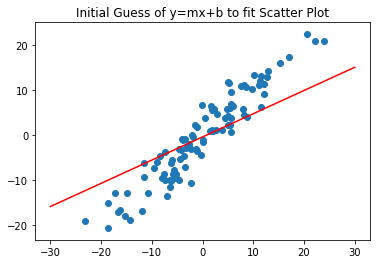

In [8]:
plot_fit('Initial Guess of y=mx+b to fit Scatter Plot')

In [0]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [10]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  print("epoch:", i, "loss:", loss.item())
  
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 29.492820739746094
epoch: 1 loss: 23.270309448242188
epoch: 2 loss: 19.004030227661133
epoch: 3 loss: 16.078929901123047
epoch: 4 loss: 14.073341369628906
epoch: 5 loss: 12.698162078857422
epoch: 6 loss: 11.755189895629883
epoch: 7 loss: 11.108538627624512
epoch: 8 loss: 10.66504192352295
epoch: 9 loss: 10.36082935333252
epoch: 10 loss: 10.152109146118164
epoch: 11 loss: 10.008858680725098
epoch: 12 loss: 9.910494804382324
epoch: 13 loss: 9.842905044555664
epoch: 14 loss: 9.796415328979492
epoch: 15 loss: 9.76439094543457
epoch: 16 loss: 9.74228572845459
epoch: 17 loss: 9.726981163024902
epoch: 18 loss: 9.716340065002441
epoch: 19 loss: 9.70889663696289
epoch: 20 loss: 9.703645706176758
epoch: 21 loss: 9.699899673461914
epoch: 22 loss: 9.697183609008789
epoch: 23 loss: 9.69517707824707
epoch: 24 loss: 9.693655967712402
epoch: 25 loss: 9.69246768951416
epoch: 26 loss: 9.691510200500488
epoch: 27 loss: 9.690710067749023
epoch: 28 loss: 9.690018653869629
epoch: 29 loss: 9.6

Text(0.5, 1.0, 'Loss/Error Seen by each epoch')

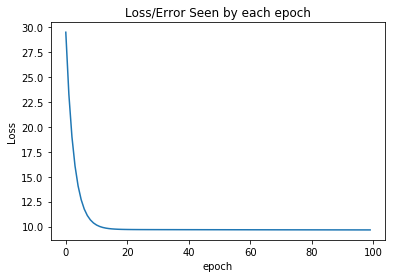

In [11]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title('Loss/Error Seen by each epoch')

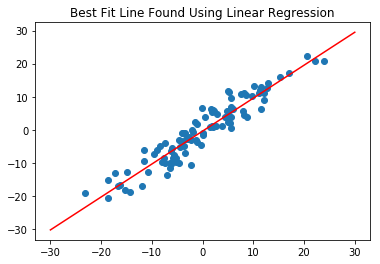

In [12]:
#@title
plot_fit("Best Fit Line Found Using Linear Regression")

In [13]:
print(get_params())

(0.9950686693191528, -0.3772332966327667)
